Thanks to https://www.w3resource.com/python-exercises/requests/index.php for the websites for practice and https://realpython.com/api-integration-in-python/. 

# REST APIs In Python

### What is an API?
API stands for application programming interface. They serve as a front end for computers that allow for access to underlying data without having to go through human interfaces.

### How is this useful?

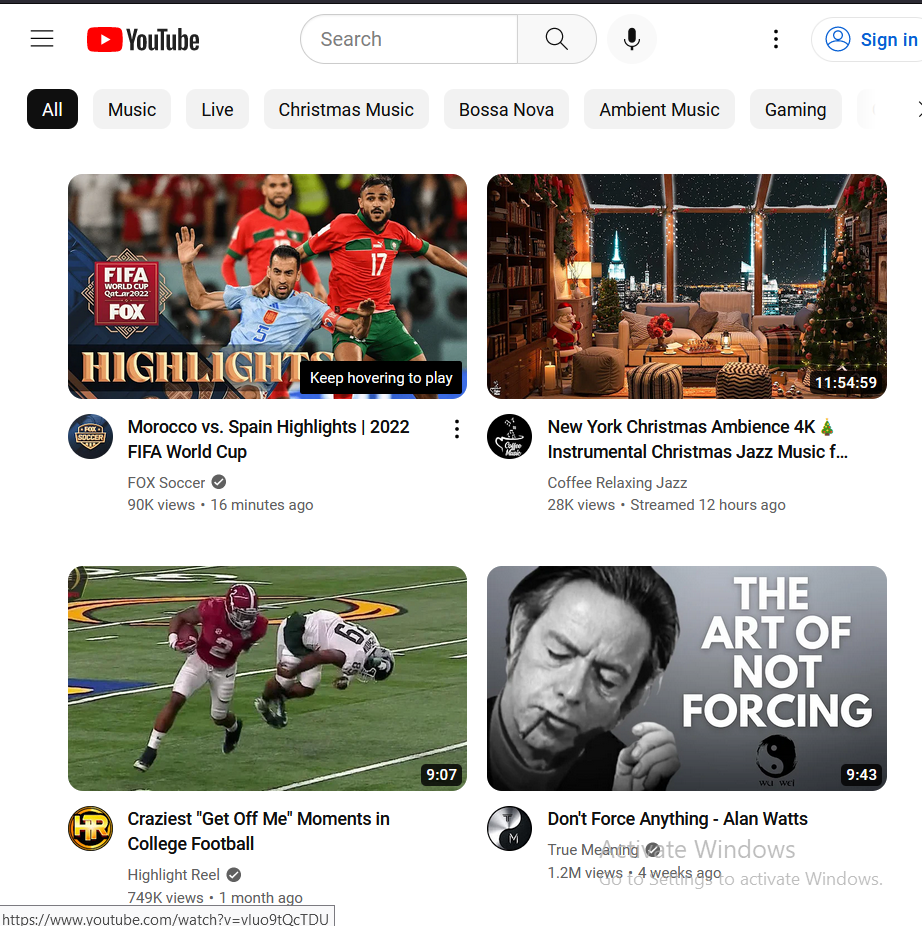

In [2]:
from IPython.display import Image
Image("youtube.png")

If we look at the youtube page above, it's easy for a human to navigate, however, that's because we're visually based. Take a moment and think about how you might gather information from this page using Python.
 
 
Most coding programming languages are based on the Unix idea that text is the fundamental communication basis for software. This means that in order to use this page, we need large libraries like pyautogui or openCV in order to process where elements are and how to engage with the code. These are computationally complex and depending on implementation may need to be rewritten for each query or webpage. Let's take a look!


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 12 20:18:48 2021

@author: benra
"""

import pyautogui
import time 
print ('run')
pyautogui.FAILSAFE = True
pyautogui.size()
width, height = pyautogui.size()
pyautogui.moveTo(1755, 868)

def clickon():
    try: 
        while True:
            x, y = pyautogui.position()
            positionStr = 'X: ' + str(x).rjust(4) + ' Y: ' + str(y).rjust(4)   
            #print(positionStr)
            pyautogui.click() 
    except KeyboardInterrupt:
        print('\nDone.')
    
while True:
    try:
        print ('here')
        closebutton=pyautogui.locateOnScreen('close.png')
        closebutton=pyautogui.center(closebutton)
        clickon()
        print ('!!!!CLICK!!!!')
    
    except:
        print ('sleep')
        time.sleep(50)

ModuleNotFoundError: No module named 'pyautogui'

Some of the things that may need to be written for each instances include:
- what the picture is
- where to click
- where to return too
- the screen dimensions

An API gets around this by skipping the visual elements and instead interacting directly with the webpage. Think Command Line vs File Explorer

### Slight Tangent
What about ML? Current best, cutting edge model is ENet, which can process images of 640x360 at 10 fps on a NVIDA TX1. Additionally, this is designed to label a single image, not subimages

### What is a REST API
REST stands for representational state transfer which just means it tells you about what is currently happening on the webpage. Notably, REST is a classification/standard of APIs, similar to SQL. They are primarily used for client/server communications which is another fancy way of saying accessing a webpage. 

### How Do They Work?
The most popular library for this is "request", and that is the implementation we will focus on for the rest of the tutorial. A call to the API or a "request" has two main parts: what to do, and how it works. Let's break down the first part.
 
There are five main functions (call HTML Methods) that a request can preform:
- GET: request for information,
- POST: add information,
- PUT: update information,
- PATCH: partially update information,
- DELETE: delete information
 
Let's look at how this works in practice!

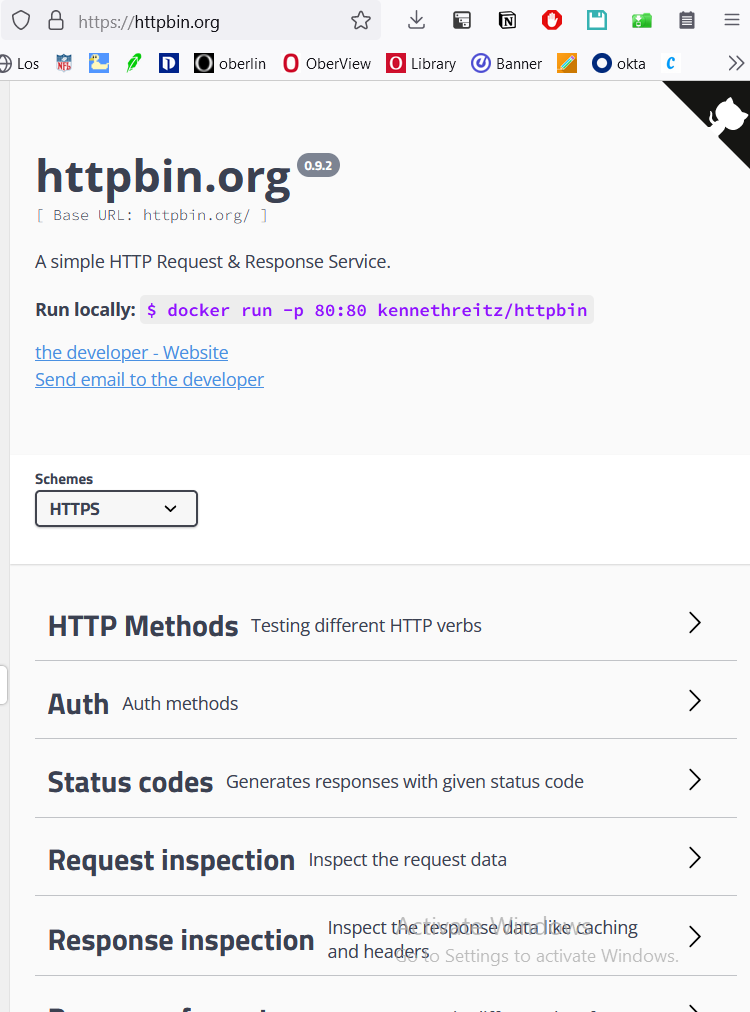

In [ ]:
Image("page.png")

In [ ]:
import requests
a = requests.get('https://httpbin.org/get')
#a = requests.get('https://youtube.com')
print(a.status_code)
print(a.json())



200
{'args': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate, br', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.28.1', 'X-Amzn-Trace-Id': 'Root=1-638f95ed-0c5343b71648ce914b15288a'}, 'origin': '132.162.25.84', 'url': 'https://httpbin.org/get'}


Notably, while we have not worked much with json data in this class, the requests library provides built-in functionality to convert python dicts into json objects and vice versa.

In [ ]:
print(a.json()['origin'])

132.162.25.84


Sometimes you may need to deal with XML data which looks like an HMTL file. Here is how they compare to json:
{
  "note": {
    "to": "Tove",
    "from": "Jani",
    "heading": "Reminder",
    "body": "Don't forget me this weekend!"
  }
}

<note>
<to>Tove</to>
<from>Jani</from>
<heading>Reminder</heading>
<body>Don't forget me this weekend!</body>
</note>


The "requests" library can handle data like this, but will need the assistance of the python "xml" library to parse and display the data.

Now, let's try an example where we update information using PATCH

In [ ]:
import requests
info={'origin':'11'}
a = requests.patch('https://httpbin.org/get',json=info)

print(a.json())
#expected output: {'origin': '11'}


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Trouble shooting and Status
Remember there are two parts to a request: what to do and did it work? That second part, is stored as a class attribute of the request object and can be accessed via <name>.status_code and has 4 main categories
 
Status code ranges:
- 2xx - success
- 3xx - redirect
- 4xx - client error
- 5xx - server error
 
Famously, 404 is an example of this. It occurs when a client (you) is asking for a webpage that is not currently hosted on the server.
 
So what happens in our example?
 


In [ ]:
#What happend?
a.status_code

405

The error is a 4xx value, so we know that the system has some issue with our request. In this case, you can google a 405 error to find that it means a given web page has received the request, correctly interpreted it, and rejected it. In our case it makes sense as why would a publicly hosted business's website allow just anyone to edit data stored on the page.

We can see that the error here then comes not from the request, but trying to print the json data we expected to be returned confirming our changes

Let's try an example where we can change stuff! Use "python -m flask run" to generate a local server server

In [6]:
import requests
a = requests.get("http://127.0.0.1:5000")
print(a.json())
print(a.status_code)


[{'area': 513120, 'capital': 'Bangkok', 'id': 1, 'name': 'Thailand'}, {'area': 7617930, 'capital': 'Canberra', 'id': 2, 'name': 'Australia'}, {'area': 1010408, 'capital': 'Cairo', 'id': 3, 'name': 'Egypt'}, {'area': 1234567, 'capital': 'AAA', 'id': 4, 'name': 'BBB'}]
200


In [3]:
#POST/ADD
params= {"id": 4, "name": "place-holder", "capital": "N/a", "area": 1111111}
a = requests.post("http://127.0.0.1:5000",json=params)
print(a.status_code)
print(a.json())

201
{'area': 1111111, 'capital': 'N/a', 'id': 4, 'name': 'place-holder'}


In [5]:
#PUT/UPDATE
params={'area': 1234567, 'capital': 'AAA' , 'id': 4, 'name': 'BBB'}
a = requests.put("http://127.0.0.1:5000",json=params)
print(a.status_code)
print(a.json())

201
{'area': 1234567, 'capital': 'AAA', 'id': 4, 'name': 'BBB'}


As a practice problem, how would you delete an element from the website? (Hint use the id key!)

In [13]:
params={'id':'1'}
a = requests.delete("http://127.0.0.1:5000",json={'id':1})
print(a.status_code)
print(a.json())

201
{'id': 1}


### Header and final thoughts
"requests" also stores metadata about itself which can be accessed via the <varible>.headers method.

In [ ]:
a.headers

{'Server': 'Werkzeug/2.2.2 Python/3.10.7', 'Date': 'Tue, 06 Dec 2022 20:20:08 GMT', 'Content-Type': 'application/json', 'Content-Length': '9', 'Connection': 'close'}

Special thanks to https://realpython.com/api-integration-in-python/ for the information I based this tutorial on and the get method in app.py

Additionally, thanks to https://www.w3resource.com/python-exercises/requests/index.php for making me aware of https://httpbin.org/get